# **Table of content**
1. [SWASH Model](#section1)
2. [Governing Equations](#section2)
3. [Model Installation](#section3)
4. [Model Operation](#section4)
5. [Wave simulations example](#section5)<br>
    5.1 [Python Packages](#section5_1)<br>
    5.2 [Model Run-script](#section5_2)<br>
    5.3 [Outputs](#section5_3)<br>
    5.4 [Plots](#section5_4)
6. [Remarks](#section6)
<br><br>
Author: Tung Dao (Dao Hoang Tung), Jan 2022



# <b id="section1">Introduction</b> <a href="#top">[back to top]</a>
---

**General information** <br>
Numerical models have been applied in many fields, and it is more important to apply them to solve the coastal hydraulic problem thank to the rapid development of computing technology. The numerical technique can be based on the finite element method, finite difference method, boundary element method, finite volume method and Eulerian-Lagrangian method. The time-stepping algorithm can be implicit, semi-implicit, explicit, or characteristic-based. The shape function can be of the first order, second-order, or higher order. The modelling can be simplified into different spatial dimensions, i.e., a one-dimensional (1D) model, two-dimensional (2D) depth-integrated model, 2D lateral-integrated model, 2D layered model and 3D model [(Coastal Wiki)](http://www.coastalwiki.org/wiki/Modelling_coastal_hydrodynamics).<br>
The [SWASH model](https://swash.sourceforge.io/) (an acronym of Simulating WAves till SHore) is a non-hydrostatic wave-flow model and is intended to be used for predicting the transformation of dispersive surface waves from offshore to the beach for studying the surf zone and swash zone dynamics, wave propagation and agitation in ports and harbours, rapidly varied shallow water flows typically found in coastal flooding resulting from e.g. dike breaks, tsunamis and flood waves, density-driven flows in coastal waters, and large-scale ocean circulation, tides and storm surges. Many studies have applied this model to solve a coastal problem, including the near zone, sediment transport, and vegetation interaction. The related publication can be found [here](https://swash.sourceforge.io/references/references.htm).<br><br>
**Applicability** <br>
This model has been applied in wave propagation to the shore and was validated in many studies, for example, wave attenuation and wave breaking processes in the swash-zone [(Smit, Zijlema, and Stelling, 2013)](https://www.sciencedirect.com/science/article/abs/pii/S0378383913000215?via%3Dihub). Furthermore, most studies that consider wave reduction due to vegetation are also taken into account the SWASH model with the vegetation implementation as a good tool.<br>
Moreover, the SWASH model is also introduce in **Computational Modelling of Flow and Transport (CIE4340)**. Therefore, this notebook can bring a brief description for users/students to apply the SWASH model in future studies. 
<br><br>
**Publications** <br>
Many variants of non-hydrostatic models have been proposed in the literature, exposing excellent features such as frequency dispersion and nonlinear wave effects. However, no advances have been made in assessing these models at an engineering level with observations under realistic nearshore conditions. Over the past 15 years, strong efforts have been made at Delft University to advance the state of wave modelling and flooding simulations for coastal engineering. A few of studies mentions:
  * An implementation of the Keller-box scheme for vertical pressure gradients to resolve frequency dispersion accurately and efficiently [(Stelling and Zijlema, 2003)](https://doi.org/10.1002/fld.595).
  * Depth-induced wave breaking in a non-hydrostatic, near-shore wave model [(Smit, Zijlema, and Stelling, 2013)](https://www.sciencedirect.com/science/article/abs/pii/S0378383913000215?via%3Dihub).
  * SWASH: An operational public domain code for simulating wave fields and rapidly varied flows in coastal waters [(Zijlema, Stelling, and Smit, 2011)](https://doi.org/10.1016/j.coastaleng.2011.05.015)<br><br>

Concerning the development of SWASH, the main achievements have been obtained in reliability, robustness, computational efficiency, and user-friendliness. SWASH has been extensively applied and validated independently. To date, over 95 peer-reviewed journal publications and proceedings papers have applied and presented SWASH results on topics such as wave propagation, dispersion, refraction, diffraction, flooding and drying, moving shoreline, hydraulic jumps, cross-shore motions of irregular breaking waves, wave runup, wave overtopping, surf beats, ig dynamics, nearshore circulations, setups induced by breaking waves, wave-current interactions, and wave interactions with floating objects. The list of publications can be found [here](https://swash.sourceforge.io/).


# <b id="section2">Governing Equations</b> <a href="#top">[back to top]</a>
---

According to [Zijlema, Stelling, and Smit (2011)](https://doi.org/10.1016/j.coastaleng.2011.05.015), the general coordinate framework can be used in
SWASH is curved orthogonal, and the governing equations, which may in
principle be written in terms of these coordinates. However, such a
form is unnecessarily complicated for the present purpose of outlining
the principles adopted. Instead, the equations are introduced in terms
of Cartesian notation. To simplify the statements without introducing
a significant loss of generality, attention is focused on the depthaveraged flow in a two-dimensional horizontal physical domain. The
extension to the three-dimensional framework is elaborated in
[Zijlema and Stelling (2005)](https://doi.org/10.1002/fld.821) and [Zijlema and Stelling (2008)](https://doi.org/10.1016/j.coastaleng.2008.02.020).<br><br>The depth-averaged, non-hydrostatic, free-surface flow can be
described by the nonlinear shallow water equations that, in turn, can
be derived from the incompressible Navier–Stokes equations that
comprise the conservation of mass and momentum. These equations
are given by: <br>

$\frac{\delta u}{\delta x} + \frac{\delta w}{\delta z} = 0$ (1) <br><br>
$\frac{\delta \eta}{\delta t} + \frac{\delta}{\delta x}\int^{\eta}_{-d}{udz} = 0$ (2)<br><br>
$\frac{\delta w}{\delta t} + \frac{\delta uw}{\delta x} + \frac{\delta ww}{\delta z} + \frac{1}{\rho}\frac{\delta (P_{nh})}{\delta z} + \frac{\delta \tau_{zz}}{\delta z} + \frac{\delta \tau_{zx}}{\delta x} = 0$ (3) <br><br>
$\frac{\delta u}{\delta t} + \frac{\delta uu}{\delta x} + \frac{\delta wu}{\delta z} + \frac{1}{\rho}\frac{\delta (P_{nh} + P_{h})}{\delta x} + \frac{\delta \tau_{xz}}{\delta z} + \frac{\delta \tau_{xz}}{\delta x} = 0$ (4) <br><br>
where $x$ and $z$ are the horizontal and vertical coordinates, respectively and $z$ is the upward coordinate related to the still water level; $u$ and $w$ are the horizontal and vertical wave orbital velocities, respectively; $\eta$ is the free surface elevation relative to the still level and $t$ is the time; the presure contribution $P$ is spitted into hydrostatic ($P_h$) and non-hydrostatic ($P_{nh}$) terms. The turbulent stresses $\tau$ are calculated from a constant turbulent viscosity.<br><br>
A bottom stress is applied at the bottom, following a quadratic friction law, as:<br>
$\tau_b = c_f\frac{u_{mean}^2}{\eta + d}$ (5) <br><br>
where, $u_{mean}$ is the depth-averaged velocity, $c_f$ is the friction coefficient based on Manning's roughness coefficient ([Zijlema et al, 2011](https://doi.org/10.1016/j.coastaleng.2011.05.015)):<br>
$c_f = \frac{n^2g}{d^{1/3}}$ (6)<br><br>
The turbulent stresses are given by:<br>
$\tau_{xx} = 2\nu \frac{\delta u}{\delta x};$
$\tau_{xy} = \tau_{yx} = \nu (\frac{\delta w}{\delta x} + \frac{\delta u}{\delta y});$
$\tau_{yy} = 2\nu\frac{\delta w}{\delta y}$ (7)

# <b id="section3">Model Intallation</b> <a href="#top">[back to top]</a>
---

1. The latest version of the SWASH model is 7.01 and can be found [here](http://swash.sourceforge.net/). <br>
2. It is recommended to consult the [User Manual](http://swash.sourceforge.net/download/zip/swashuse.pdf) before running any test cases. <br>
3. Test cases can be found [here](http://swash.sourceforge.net/).


# <b id="section4">Model Operation</b> <a href="#top">[back to top]</a>
---

**Run the model**

After installation, SWASH model can be operated by window DOS commant promt. The command input file can be edited by using an ASCII editor, for example MS Notepad or [Notepad++](https://notepad-plus-plus.org/downloads/).

When the command file is ready, the model can run. Note that the command file must be save as 'filename.sws'. In DOS promt, users need to locate the directory that the command file located, and users type 'swashrun filename.sws' to run the model.

*Some tips for using DOS promt:*

```
 * cd       - change directory (or folder)
 * mkdir    - creat a new directory
 * rmdir    - remove an exsiting directory
 * dir      - list file and directories in curent directory
 * copy     - copy file(s) to other location
 * del      - delete file(s)
 * ren      - rename file or directory
 * type     - to check the content of a file

 * swashrun - run the model
 ```

# <b id="section5">Wave simulation example</b> <a href="#top">[back to top]</a>
---

## <b id="section5_1">Python Packages</b> <a href="#top">[back to top]</a>
---

In [21]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML, display
from tabulate import tabulate
plt.rcParams.update({'font.size':17}) # Use for all plots

**Import calculation packages** (Use for Colabs)

In [3]:
# Getting package from Github / Make a clone inside Colab
%cd /content/
!git clone https://github.com/HoangTungDao/notebook_packages.git

/content
fatal: destination path 'notebook_packages' already exists and is not an empty directory.


In [2]:
# It takes a few seconds for Colabs download the git clone.
%cd /content/notebook_packages/
!python Py_1DProfile.py
from Py_1DProfile import check_T_for_resolution
from Py_1DProfile import create_xp_zp_sws

/content/notebook_packages


## <b id="section5_2">Model Run-script</b> <a href="#top">[back to top]</a>
---

Before practicing, it is recommendedn that users should read the User Manual and examples on the official website of SWASH. Also, the brief guideline for installation, interpretation of commnand files and bathymetry for 1D simulation can be found [here](https://colab.research.google.com/drive/1M7YrSOv6xSdRSPI2K2ttvPI689O7bMaU#scrollTo=yruFextFdFiC).

In this practice, users run 1D test of wave propagation to the shore from the water depth of 10 m. The forshore slope is 1:10, uniform and rectangular. Still water level is 0.0 m. The wave conditions are regular with **$H_{rms}$ = 1.0** m, and **$T$ = 5.5** s. And successfuly create outputs as:
 * Plot root-mean-squre wave height (Hrms) at every location along the profile.
 * Hrms at **8.0** m, **5.0** m, and **1.0** m water depth. 
 * Plot water surface elevation at the above locations.

### Table of variables

No. | Parameter interpretation                  | Use in code    | Units (-) | Examples | --- | No. | Parameter interpretation                  | Use in code | Units (-) | Examples
--- | ----------------------------------------- | -------------- | ----------| :------: | :-: | --- | ----------------------------------------- | ----------- | --------- | --------
1   | Gravitational accleration ($g$)           | grav           | m$^2$/s   | -        | --- | 14  | Water depth                               | wdepth      | m         | -        
2   | Time steps                                | timestep       | s         | -        | --- | 15  | Water depth at deep water                 | wdepth0     | m         | -        
3   | Wave frequency ($f$)                      | freq           | Hz        | -        | --- | 16  | Wavelength                                | wlength     | m         | -        
4   | Maximum frequency ($f_{min}$)             | freq_max       | Hz        | -        | --- | 17  | Wavelength at deep water                  | wlenght0    | m         | -        
5   | Minimum frequency ($f_{min}$)             | freq_min       | Hz        | -        | --- | 18  | Water elevation ($\eta$)                  | eta         | m         | -
6   | Peak wave frequency ($f_p$)               | freq_peak      | Hz        | -        | --- | 19  | Measurement duration                      | mdur        | s or mins | -
7   | Sampling frequency                        | freq_sample    | Hz        | -        | --- | 20  | model resolution                          | dx          | m         | -
8   | Peak Wave period ( $T_p$)                 | wperiod        | s         | -        | --- | 21  | SWASH                                     | sws         | -         | -
9   | Spectral density ($E$)                    | spect_dens     | m$^2$/Hz  | -        | --- | 22  | File name                                 | fname       | -         | -
10  | Maximum spectral density ($E_{max}$)      | max_spect_dens | m$^2$/Hz  | -        | --- | 23  | block length                              | ntff        | -         | -
11  | Wave height ($H$)                         | wheight        | m         | -        | --- | 24  | Uniform resource locators                 | url         | -         | fname_url  
12  | Significant Wave height ($H_s$)           | sig_wheight    | m         | -        | --- | 25  | Profile                                   | p           | -         | xp; zp
13  | Root-mean-squares Wave height ($H_{rms}$) | rms_wheight    | m         | -        | --- | 

### Initial parameters

In [3]:
wheight = 1.5
wperiod = 5.5, 3.5
wdepth0 = 10
bot_slope = 1/10, 1/30
length_slope = 100, 10
outp_depth = 8, 5, 1

### Calculate model resolution

Firstly, all the required files to successfully run the model with above parameters are the input command, and the bathymetry. But first, it is needed to calculate several constant variables.

Hypothesizing that wave will travel to the shallow zone, where d/L $\approx$ 1/20.
As moving to the shore, the resolution (dx) of the model should be samller than at the deep water. However, there is impossible to have more than two resolutions in SWASH, therefore, it is recommended to calculate
dx at the shallow zone, and apply to the whole domain. The dx is normally between L/50 to L/100 where L is wavelength in the shallow zone. 

Note that smaller resolution will increase the real computation time. So choose wisely!

In [4]:
# Calculate resolution
dx, wlength0, wlength = check_T_for_resolution(wheight, wperiod, wdepth0)


At boundary:            
 Initial water depth is 10 m.            
 Initial wave height is 1.5 m.            
 Minimum wave period is 3.5 s.
Warning 1:            
 Deep water zone.            
 Resolution (dx) is too large.             
 Reducing water depth by half;             
 Calculate again wavelength
Result: L = 18.00 m, and dx is 0.18 m.



Number of mesh is 613          
Total length of profile is 110.0 m.


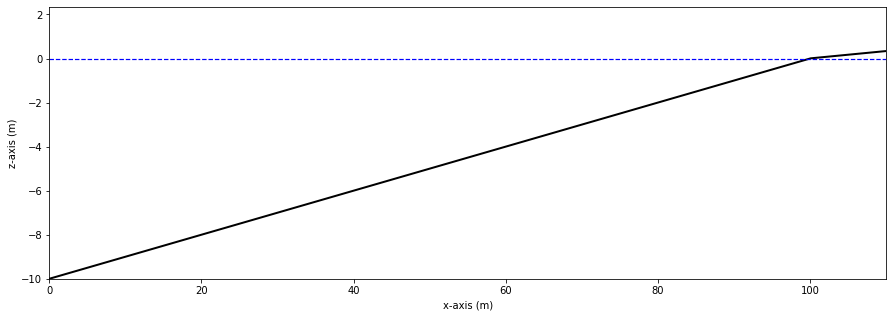

In [5]:
# Create bottom level data
xp_sws, zp_sws = create_xp_zp_sws(dx, wdepth0, bot_slope, length_slope)

### Calculate and plot output points

Output points P1 at depth 8 m has (x, y) = (20.0, 0.0)

Output points P2 at depth 5 m has (x, y) = (50.0, 0.0)

Output points P3 at depth 1 m has (x, y) = (90.0, 0.0)



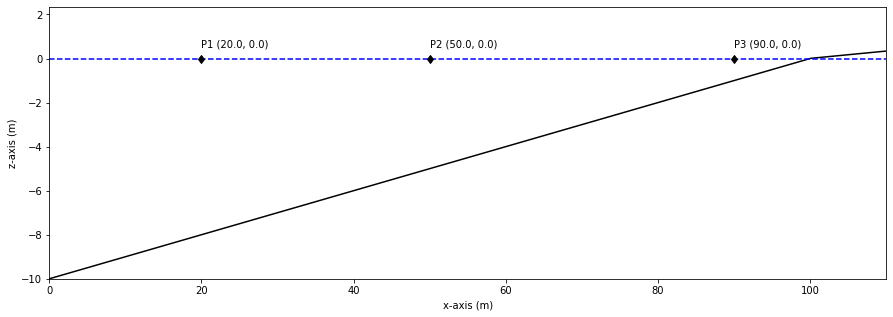

In [6]:
total_length = np.sum(length_slope)
# Create output points
z_outp = np.array(outp_depth)
numb_outp = len(z_outp)
point_numb = np.arange(1, numb_outp+1, 1)
# Only consider the profile under still water level
x_outp = z_outp / bot_slope[0] - length_slope[0]
y_outp = np.zeros(numb_outp)
# Print output information
for i in range(numb_outp):
    print(f'Output points P{point_numb[i]} at depth '
          f'{outp_depth[i]} m has (x, y) = '
          f'({-x_outp[i]}, {y_outp[i]})\n')
# ------------------------------------------------------------------------
# PLot profile with output points
plt.figure(figsize=(15, 5))
plt.plot(xp_sws, zp_sws * -1, 'k-')
plt.plot([xp_sws[0], xp_sws[-1]], [0, 0], 'b--')
plt.plot(-x_outp, y_outp, 'kd')
for i in range(numb_outp):
    plt.text(-x_outp[i], y_outp[i] + 0.5,
             f'P{point_numb[i]}'
             f' ({-x_outp[i]}, {y_outp[i]})')
plt.xlabel('x-axis (m)')
plt.ylabel('z-axis (m)')
plt.xlim(xp_sws[0], xp_sws[-1])
plt.ylim(-zp_sws[0], -zp_sws[-1] + 2)
plt.show()

### Extract bottom level

In [13]:
# Save bottom level
fname = 'exercise'
fnumb = '02'
file_bot = f'{fname}_{fnumb}.bot'
np.savetxt(file_bot, zp_sws, delimiter=',')
%cd /content
print(f'The bottom level and command file have been saved as: {file_bot} \
\nPlease find those files at local Colab directory: /content/')

/content
The bottom level and command file have been saved as: exercise_02.bot 
Please find those files at local Colab directory: /content/


### Command script

Below is the command lines created based on the initial wave parameter in this exercise. This is the screenshot of the file that need to have to run the model properly. <br><br>

Users can also check the command lines by using the code ``` print(command_lines)```. All command lines will be appeared below as same as the below screenshoot. 


<img src="https://raw.githubusercontent.com/HoangTungDao/Wave-fence-SWASH-simulation/main/exercise_runfile.jpeg">

### Operate model

Some tips during running the model. In the figure below, users can see:
  * All files, the command files, '**exercise_02.sws**', and the bottom level, '**exercise_02.bot**', are needed to be in the same directory.
  * It is recommended to create a folder in '***C:\***' drive, such as "**swash_folder**", and put all files in that folder.
  * Twhen the DOS promt pop-up, the directory in that window is '***C:\Users\Username***'. Users must turn back to '***C:\***' directory by using "**cd..**" two times to get to directory '***C:\***'. Then use '**cd swash_folder**' to get to the '***C:\swash_folder***' directory.
  * From this directory, users can check if the files are there by using command '**dir**' to list all files and other directories. Files should be appeared on the promt window.
  * If the users put the '**swash_folder**' in another drive, such as '***D:\***', users simply use command '**D:**' to get to the '***D:\***' directory. Then, all above steps can be repeated to get to the **swash_folder**.
  * To run the model, users must use the command '**swashrun exercise_01.sws**'. Note that the command file must have file type as '***.sws***'.

Users might have some problem when running the model. Do not panic. Go to the **swash_folder**, find the file name **exercise_02.prt**. The model will print all and erros if there is any problem during the run. If there is nothing wrong with the command lines, the model should run smoothly.

**Output notes**

The outputs of SWASH model are defined in the command lines. In the exercise:
  * the '**exercise_fr.tbw**' file has results of x-axis, significant wave heights, root-mean-square wave heights, and set-up;
  * the '**exercise_Pi.tbw**' files, where "i" is the number of output points from 0 to 2, have results of record time, and water level. Their records start at 5 minutes with the dt = 0.01 s, because the model starts as cold start with the command 'initial zero'. The locations of the points are at x = 20, 50 and 90 m according to the water depth 8.0, 5.0, and 1.0 m. 

The required calculations and plots from the exercise are:
  * Wave height at 8 m, 5 m and 1 m water depth.
  * Wave heights, wavelengths, and wave periods at the same locations from elevation results.


<img src="https://raw.githubusercontent.com/HoangTungDao/Wave-fence-SWASH-simulation/main/exercise_outfiles.jpeg">

---

## <b id="section5_3">Outputs</b> <a href="#top">[back to top]</a>
---

In [14]:
# Getting package from Github / Make a clone inside Colab
%cd /content/
!git clone https://github.com/HoangTungDao/Wave-fence-SWASH-simulation.git

/content
Cloning into 'Wave-fence-SWASH-simulation'...
remote: Enumerating objects: 61, done.
remote: Counting objects: 100% (61/61), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 61 (delta 20), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (61/61), done.


In [15]:
# Again, it takes a few seconds for Colabs download the git clone
%cd /content/Wave-fence-SWASH-simulation/Results
# List all files in the mentioned directory
%ls /content/Wave-fence-SWASH-simulation/Results
# Loading data from the folder
headlines = 7
datafr_sws = np.loadtxt('exercise_fr.tbw', skiprows=headlines)
datap1_sws = np.loadtxt('exercise_P1.tbw', skiprows=headlines)
datap2_sws = np.loadtxt('exercise_P2.tbw', skiprows=headlines)
datap3_sws = np.loadtxt('exercise_P3.tbw', skiprows=headlines)

/content/Wave-fence-SWASH-simulation/Results
exercise_fr.tbw  exercise_P1.tbw  exercise_P2.tbw  exercise_P3.tbw


## <b id="section5_4">Results & Plots</b> <a href="#top">[back to top]</a>
---

 * Plot root-mean-squre wave height (Hrms) at every location along the profile.
 * Hrms at **8.0** m, **5.0** m, and **1.0** m water depth. 
 * Plot water surface elevation at the above locations.

**Call variables from data**

No.  | Variables name               | Unit | Code   | Sources
:---:| ---------------------------- | ---- | ------ | -------
1    | Time series                  | s    | times  | data1_sws 
2    | Elevation at z = 8 m         | m    | eta_P1 | data1_sws
2    | Elevation at z = 5 m         | m    | eta_P2 | data2_sws
2    | Elevation at z = 1 m         | m    | eta_P3 | data3_sws
3    | wave set-up                  | m    | Setup  | datafr_sws
4    | Root-mean-square wave height | m    | Hrms   | datafr_sws
5    | Cross-shore axis             | m    | x_sws  | datafr_sws

In [18]:
# Times series data
times = datap1_sws[:,0]
eta_p1 = datap1_sws[:,1]
eta_p2 = datap2_sws[:,1]
eta_p3 = datap3_sws[:,1]
eta = np.array([eta_p1, eta_p2, eta_p3])
# From frame data
x_sws = datafr_sws[:,0]
Hrms_all = np.round(datafr_sws[:,1], 2)
Hrms_all[Hrms_all == -9] = 0            # Update Hrms
Setup = np.round(datafr_sws[:,2],4)
Setup[Setup == -9] = 0                  # Update Set up values

**Plot results**

The P1 point at depth = 8 m has Hrms = 0.93 m & Set-up = 0.0454 m.
The P2 point at depth = 5 m has Hrms = 1.09 m & Set-up = 0.0404 m.
The P3 point at depth = 1 m has Hrms = 0.82 m & Set-up = 0.0399 m.


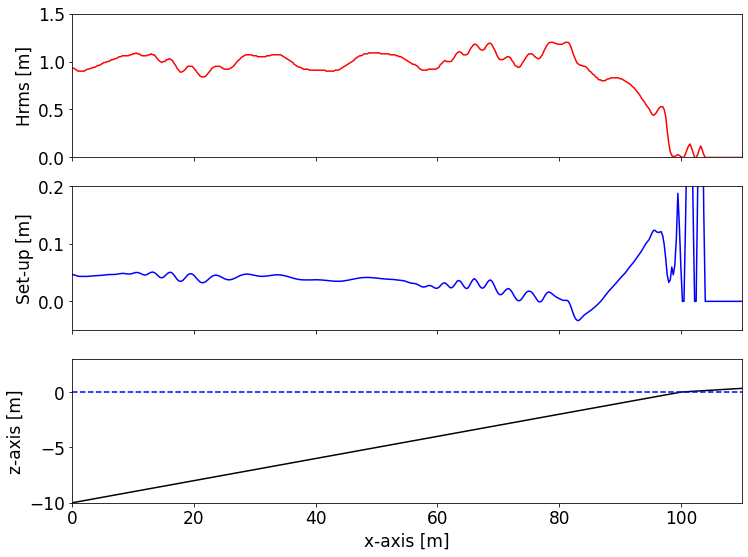

In [28]:
# print results
x_id = []
for i in range(numb_outp):
  # Wave heights at locations 20, 50, and 90 m.
  x_id_temp = np.where(x_sws == -x_outp[i])
  x_id = np.append(x_id, x_id_temp)
  x_id = x_id.astype(int)
  Hrms_outp = Hrms_all[x_id]
  Setup_outp = Setup[x_id]
  # Answers
  point_name = 'P'
  print(f"The {point_name}{point_numb[i]} point at depth = {outp_depth[i]} m \
has Hrms = {Hrms_outp[i]} m & Set-up = {Setup_outp[i]} m.")

# Plotting wave height along the profile
axis_Hrms = ([xp_sws[0], xp_sws[-1], 0, 1.5])
axis_Setup = ([xp_sws[0], xp_sws[-1], -0.05, 0.2])
axis_Profile = ([xp_sws[0], xp_sws[-1], -zp_sws[0], 3])
fig, ax = plt.subplots(3,1, figsize = (12, 9), sharex=True)
ax[0].plot(x_sws,Hrms_all, '-r')
ax[0].set_ylabel('Hrms [m]')
ax[0].axis(axis_Hrms)
ax[1].plot(x_sws,Setup, '-b')
ax[1].set_ylabel('Set-up [m]')
ax[1].axis(axis_Setup)
ax[2].plot(xp_sws, -zp_sws, 'k-')
ax[2].plot([xp_sws[0], xp_sws[-1]], [0, 0], 'b--')
ax[2].set_xlabel('x-axis [m]')
ax[2].set_ylabel('z-axis [m]')
ax[2].axis(axis_Profile)
plt.show()

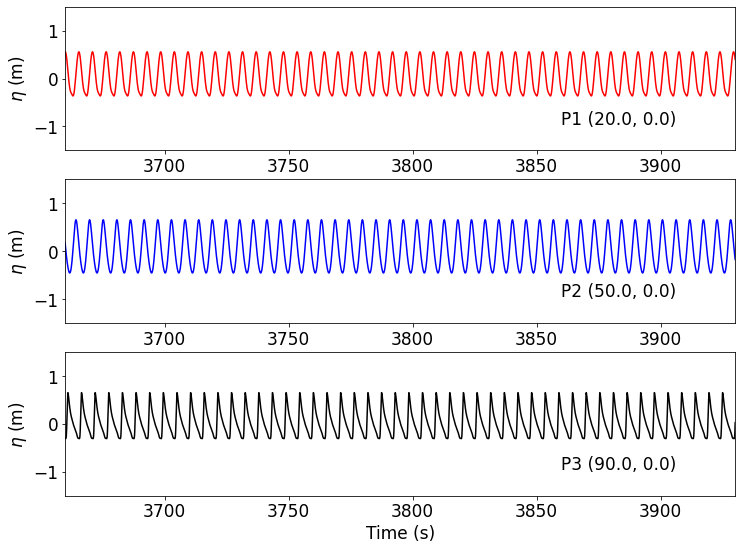

In [32]:
# Plotting elevation
char = ('r-', 'b-', 'k-')
initial_time = 270
plt.figure(figsize= (12, 9))
for i in range(numb_outp):
  plt.subplot(3,1,i+1)
  plt.plot(times, eta[i,:], char[i])
  plt.xlim([np.mean(times), np.mean(times+initial_time)])
  plt.ylim([-1.5, 1.5])
  plt.ylabel('$\eta$ (m)')
  plt.text(3860, -0.95,
      f"{point_name}{point_numb[i]} ({-x_outp[i]}, {y_outp[i]})")
plt.xlabel('Time (s)')
plt.show()

# <b id="section6">Remarks</b> <a href="#top">[back to top]</a>
---

This notebook firstly introduce several information of the SWASH model including governing equations, and how to install and run the model. It also show a simple simulation of wave propagation from deep water to shallow water in the SWASH model. The input parameters at the boundary include the initial wave height of 1.5 m, water depth of 10 m and wave period of 5.5 seconds.
After getting through the results, users should be able to install the model and simulate another example based on their own design.